In [1]:
from gefpy.bgef_creater_cy import BgefCreater
from gefpy.bgef_writer_cy import generate_bgef
import pandas as pd

In [ ]:
rna_df = pd.read_csv("./RNA/D03658A3.gem", sep='\t',comment = '#')
grna_df = pd.read_csv("./gRNA/B924/D03658A3-merged.gem", sep='\t', comment='#')

In [2]:
generate_bgef(input_file="/home/wpy/stereoseq/20240502-SPACseq/RNA/D03658A3.merged.gem", bgef_file="/home/wpy/stereoseq/20240502-SPACseq/RNA/D03658A3.merged.gef", n_thread=20, bin_sizes=[1])

geneID	x	y	MIDCount	ExonCount
 5
create bgef file: /home/wpy/stereoseq/20240502-SPACseq/RNA/D03658A3.merged.gef
bin 1 matrix: min_x=0 len_x=23520 min_y=0 len_y=20580 matrix_len=484041600
bin 100 matrix: min_x=0 len_x=236 min_y=0 len_y=206 matrix_len=48616


In [2]:
from stereo.tools.tissue_extraction import tissue_extraction_to_bgef

In [3]:
# 注意：
# 0. gef文件
# 1. hdf5版本要1.14.2以上，但由于stereopy默认用1.14.0 hdf5编译的，要设置'HDF5_DISABLE_VERSION_CHECK=1'
# 2. python Import包的时候，pip版本缺segment_utils目录，conda版本缺tissue_cut_utils目录，需要从git上手动clone然后放到对应位置
# 3. 指令里，不能设置save_result_bgef，会报缺页
# 4. 输出结果文件夹里不能有任何东西
rna_tissue_cut = tissue_extraction_to_bgef(
    dst_mask_dir_path="./RNA/result",
    src_gef_path="/home/wpy/stereoseq/20240502-SPACseq/RNA/D03658A3.merged.gef",
    src_type=0,
    dst_bgef_path="/home/wpy/stereoseq/20240502-SPACseq/RNA/D03658A3.cut.gef",
    save_result_bgef=True
)
rna_tissue_cut.tissue_seg()

[2024-05-13 11:28:38][Stereo][232840][MainThread][140133864150848][pipeline][64][INFO]: source image type: RNA
[2024-05-13 11:28:38][Stereo][232840][MainThread][140133864150848][pipeline][65][INFO]: segmentation method: intensity segmentation


: 

: 

: 

In [ ]:
src_gem_path = "/home/wpy/stereoseq/20240502-SPACseq/RNA/D03658A3.merge.gem"
dst_bgef_path = "/home/wpy/stereoseq/20240502-SPACseq/RNA/D03658A3.merge.gef"

bc = BgefCreater()
data = bc.get_stereo_data(src_gem_path, 1, "/home/wpy/stereoseq/20240502-SPACseq/RNA/D03658A3.merge.tif")

In [3]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
raw_mask = io.imread('./RNA/D03658A3.merged_tissue_cut.tif')

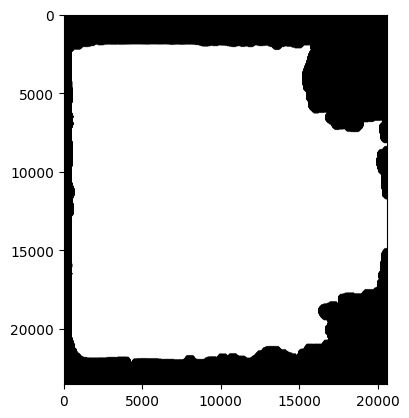

In [5]:
tissue_mask = np.transpose(raw_mask)
plt.imshow(tissue_mask, cmap='gray')